In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn import preprocessing

In [4]:
pip install --upgrade tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=b624af227801476c563cfeb95ad0b2785d844f054d44e6be861e91bab8ee58fd
  Stored in directory: c:\users\hanif\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [2]:
dataset = pd.read_csv('spotify-train.csv')
test = pd.read_csv('spotify-predict.csv')

In [3]:
dataset.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,artist,track_name,popularity,success
0,0.775,0.1080,126.984,0.1080,0.27700,0.0,4,0.817,10,234334,-4.767,0.8060,0,Wiz Khalifa,The Thrill,79,1
1,0.611,0.1160,185.727,0.0467,0.02280,0.0,3,0.410,4,184448,-8.271,0.0899,0,Elley Duhé,MIDDLE OF THE NIGHT,67,1
2,0.560,0.1150,162.794,0.1430,0.09090,0.0,4,0.599,0,168391,-8.569,0.3940,0,Irina Rimes,Pentru totdeauna,50,1
3,0.530,0.0995,106.958,0.0333,0.44300,0.0,4,0.688,11,205687,-5.507,0.1620,1,Lewis Capaldi,Hold Me While You Wait,78,1
4,0.714,0.0764,98.992,0.0334,0.00937,0.0,4,0.472,1,236133,-4.389,0.2400,0,Ariana Grande,Love Me Harder,76,1


In [4]:
dataset.shape

(4249, 17)

In [5]:
dataset.dtypes

energy              float64
liveness            float64
tempo               float64
speechiness         float64
acousticness        float64
instrumentalness    float64
time_signature        int64
danceability        float64
key                   int64
duration_ms           int64
loudness            float64
valence             float64
mode                  int64
artist               object
track_name           object
popularity            int64
success               int64
dtype: object

In [6]:
dataset.describe()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,popularity,success
count,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000
mean,0.623264,0.178915,122.114578,0.091182,0.298615,0.055313,3.962344,0.639015,5.335138,216962.032008,-7.232818,0.505107,0.571664,54.372088,0.444104
std,0.207518,0.153053,28.877914,0.090580,0.293144,0.181376,0.287029,0.151667,3.608970,66195.365658,3.452928,0.226132,0.494896,21.771837,0.496924
min,0.007560,0.019400,46.509000,0.023100,0.000002,0.000000,1.000000,0.130000,0.000000,85333.000000,-27.331000,0.017400,0.000000,0.000000,0.000000
25%,0.494000,0.094900,98.967000,0.037300,0.041800,0.000000,4.000000,0.539000,2.000000,177514.000000,-8.562000,0.331000,0.000000,44.000000,0.000000
50%,0.651000,0.119000,121.958000,0.053100,0.196000,0.000004,4.000000,0.649000,5.000000,204994.000000,-6.558000,0.501000,1.000000,57.000000,0.000000
75%,0.779000,0.201000,140.020000,0.101000,0.515000,0.000804,4.000000,0.752000,9.000000,238547.000000,-4.978000,0.686000,1.000000,71.000000,1.000000
max,1.000000,0.989000,227.895000,0.865000,0.994000,0.968000,5.000000,0.975000,11.000000,824133.000000,1.906000,0.977000,1.000000,100.000000,1.000000


In [7]:
dataset.isnull().sum()

energy              0
liveness            0
tempo               0
speechiness         0
acousticness        0
instrumentalness    0
time_signature      0
danceability        0
key                 0
duration_ms         0
loudness            0
valence             0
mode                0
artist              0
track_name          0
popularity          0
success             0
dtype: int64

In [8]:
scaler = MinMaxScaler() 

scaled_values = scaler.fit_transform(dataset[['tempo', 'key', 'duration_ms','loudness', 'popularity']]) 
dataset[['tempo', 'key', 'duration_ms','loudness', 'popularity']] = scaled_values

scaled_values = scaler.fit_transform(test[['tempo', 'key', 'duration_ms','loudness', 'popularity']]) 
test[['tempo', 'key', 'duration_ms','loudness', 'popularity']] = scaled_values

dataset.describe()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,popularity,success
count,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000
mean,0.623264,0.178915,0.416821,0.091182,0.298615,0.055313,3.962344,0.639015,0.485013,0.178166,0.687423,0.505107,0.571664,0.543721,0.444104
std,0.207518,0.153053,0.159207,0.090580,0.293144,0.181376,0.287029,0.151667,0.328088,0.089598,0.118101,0.226132,0.494896,0.217718,0.496924
min,0.007560,0.019400,0.000000,0.023100,0.000002,0.000000,1.000000,0.130000,0.000000,0.000000,0.000000,0.017400,0.000000,0.000000,0.000000
25%,0.494000,0.094900,0.289206,0.037300,0.041800,0.000000,4.000000,0.539000,0.181818,0.124771,0.641961,0.331000,0.000000,0.440000,0.000000
50%,0.651000,0.119000,0.415958,0.053100,0.196000,0.000004,4.000000,0.649000,0.454545,0.161967,0.710504,0.501000,1.000000,0.570000,0.000000
75%,0.779000,0.201000,0.515536,0.101000,0.515000,0.000804,4.000000,0.752000,0.818182,0.207382,0.764545,0.686000,1.000000,0.710000,1.000000
max,1.000000,0.989000,1.000000,0.865000,0.994000,0.968000,5.000000,0.975000,1.000000,1.000000,1.000000,0.977000,1.000000,1.000000,1.000000


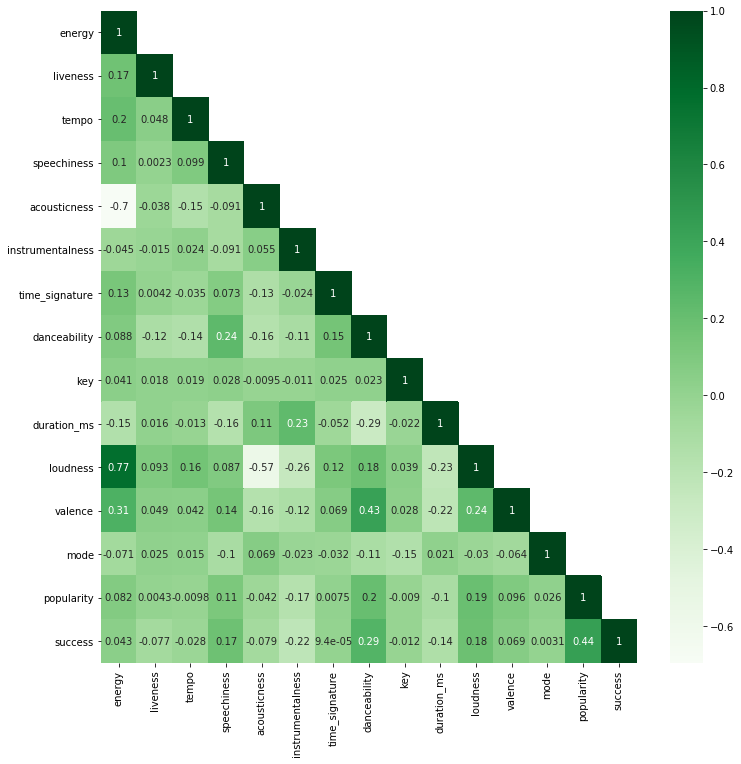

In [9]:
plt.figure(figsize=(12,12))

corr = dataset.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, 1)] = True

sns.heatmap(corr, mask=mask, annot=True, cmap="Greens")

In [10]:
def plot_dist_reg (n_rows, n_elem, axis, features, colors, titles):
    fig, (axis) = plt.subplots(n_rows, n_elem, figsize=(15, 5))   
    itens = len(axis)
    i = 0
    while i < itens:
        axis[i] = sns.regplot(x = dataset[features[i][0]], y = dataset[features[i][1]], data=dataset, color=colors[i], line_kws={'color':'black'}, ax=axis[i])
        axis[i].set_title(titles[i])
        i+=1
    plt.subplots_adjust(wspace=0.5)
    plt.show()

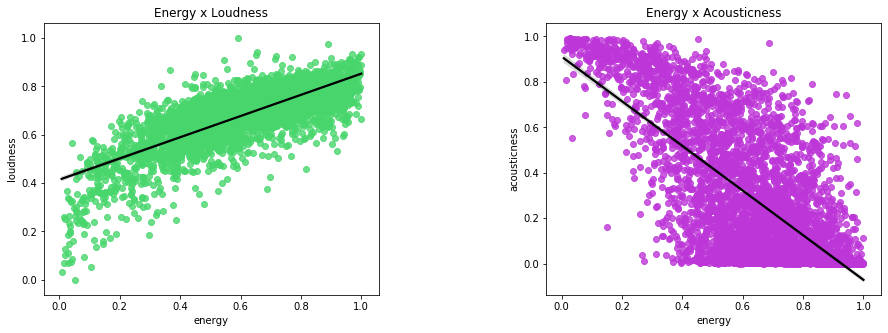

In [11]:
# Features with high positive correlation: energy and loudness
# Features with high negative correlation: energy and acousticness
axis = ['ax0','ax1']
features = [['energy','loudness'],['energy','acousticness']]
colors = ['#48d66c', '#bd36d8']
titles = ['Energy x Loudness', 'Energy x Acousticness']
plot_dist_reg(1, 2, axis, features, colors, titles)

In [12]:
def show_values_on_bars(ax, h_v, space):
    if h_v == "v":
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = int(p.get_height())
            ax.text(_x, _y, value, ha="center") 
    elif h_v == "h":
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            value = int(p.get_width())
            ax.text(_x, _y, value, ha="left")

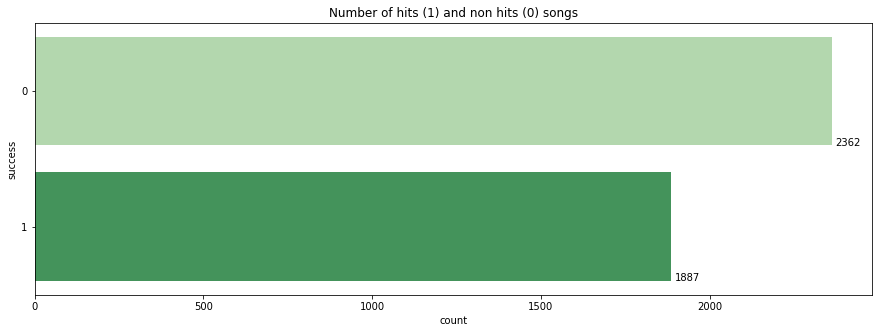

In [13]:
# Class analysis
plt.figure(1 , figsize = (15 , 5))
ax = sns.countplot(y = 'success', data = dataset, palette="Greens")
ax.set_title('Number of hits (1) and non hits (0) songs')
show_values_on_bars(ax, "h", 10)
plt.show()